# P9 K-Means

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Selección de los Datos y Visualización

Una vez que hemos descargado el archivo con los datos de los equipos, seleccionamos 500 datos aleatorios, así como las columnas con el nombre del equipo, las estadísticas de ofensiva y defensiva.


In [64]:
equipos = pd.read_csv('spi_global_rankings.csv', usecols = ['name', 'off', 'def'], index_col = 'name')
equipos = equipos.sample(n = 500, random_state = 777)
equipos.head()

,off,def
name,,
Luton Town,1.35,0.94
Anderlecht,1.46,1.18
Empoli,1.57,1.25
Austria Lustenau,1.31,1.82
Leganes,0.86,1.33


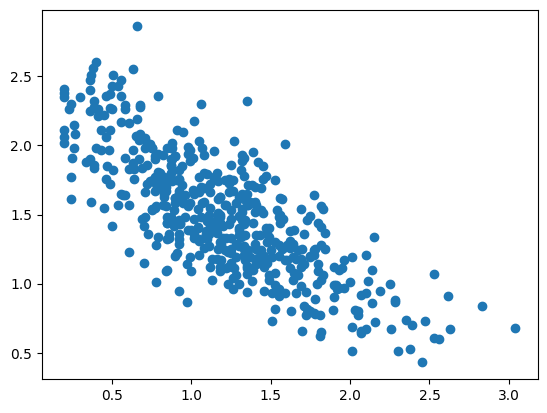

In [65]:
plt.scatter(equipos['off'], equipos['def'])
plt.show()

# Implementación del Método del Codo

Para determinar el número óptimo de clústeres para la agrupación de nuestros datos, hemos aplicado el método del codo. Este método implica la ejecución del algoritmo K-Means sobre el conjunto de datos para un rango de valores de k (por ejemplo, de 1 a 10) y calcular la suma de las distancias al cuadrado de cada punto a su centroide asignado.

El código para implementar el método del codo en Python usando la librería `sklearn` es el siguiente:



In [66]:
cuadrados = []
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(equipos)
    cuadrados.append(kmeans.inertia_)

cuadrados

[224.9305141999999,
 100.57408349912794,
 61.162924636922895,
 46.04738656835063,
 37.83737173316567,
 30.46515119246827,
 26.515998130759627,
 23.532921973979814,
 20.662288332978,
 18.684711527409036]

## Justificación de la Elección de Clústeres para K-Means

Al clasificar equipos de fútbol según sus capacidades ofensivas y defensivas, la elección de \( k \) en el algoritmo K-Means es crucial para obtener una segmentación significativa que pueda informar decisiones estratégicas. La selección de \( k=3 \), \( k=4 \), y \( k=5 \) para realizar pruebas se basó en una combinación de observación visual utilizando el método del codo y la naturaleza de nuestros datos.

- **Observación Visual**: La gráfica del método del codo muestra puntos de inflexión claros en \( k=3 \), \( k=4 \), y \( k=5 \). Estos puntos sugieren que aumentar el número de clústeres más allá de estos valores produce rendimientos decrecientes en términos de la variabilidad explicada dentro de cada clúster.

- **Información Contextual**: Dado el contexto del fútbol, es razonable agrupar equipos en un número manejable de categorías que reflejen diferentes combinaciones de fortalezas y debilidades ofensivas y defensivas. Con \( k=3 \), podemos identificar equipos con alto, medio y bajo rendimiento. Con \( k=4 \) y \( k=5 \), podemos distinguir entre diversos estilos de juego y tácticas, lo que puede ser beneficioso para un análisis más granular.

Por lo tanto, hemos elegido probar estos tres valores de \( k \) para identificar el nivel óptimo de granularidad para nuestra clasificación. Cada valor de \( k \) se someterá a pruebas y se evaluará con base en su capacidad para proporcionar insights accionables y su alineación con el conocimiento del dominio del fútbol.


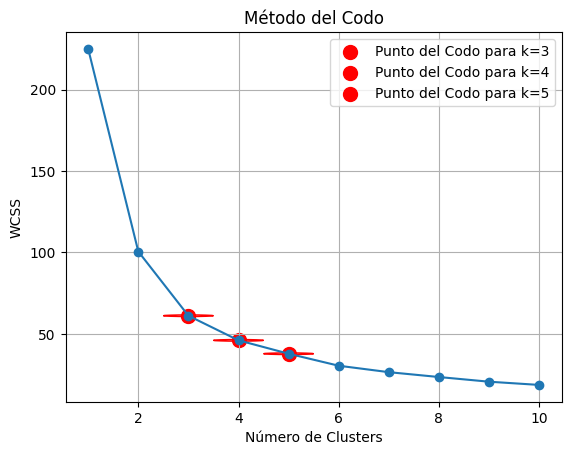

In [67]:
plt.plot(range(1, 11), cuadrados, marker='o')  # Añade marcadores en cada punto
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')

# Resaltar el punto para k=3
plt.scatter(3, cuadrados[2], s=100, c='red', label='Punto del Codo para k=3')
circle3 = plt.Circle((3, cuadrados[2]), 0.5, color='red', fill=False)
plt.gcf().gca().add_artist(circle3)

# Resaltar el punto para k=4
plt.scatter(4, cuadrados[3], s=100, c='red', label='Punto del Codo para k=4')  
circle4 = plt.Circle((4, cuadrados[3]), 0.5, color='red', fill=False)
plt.gcf().gca().add_artist(circle4)

# Resaltar el punto para k=5
plt.scatter(5, cuadrados[4], s=100, c='red', label='Punto del Codo para k=5') 
circle5 = plt.Circle((5, cuadrados[4]), 0.5, color='red', fill=False)
plt.gcf().gca().add_artist(circle5)

plt.grid(True)
plt.legend()
plt.show()

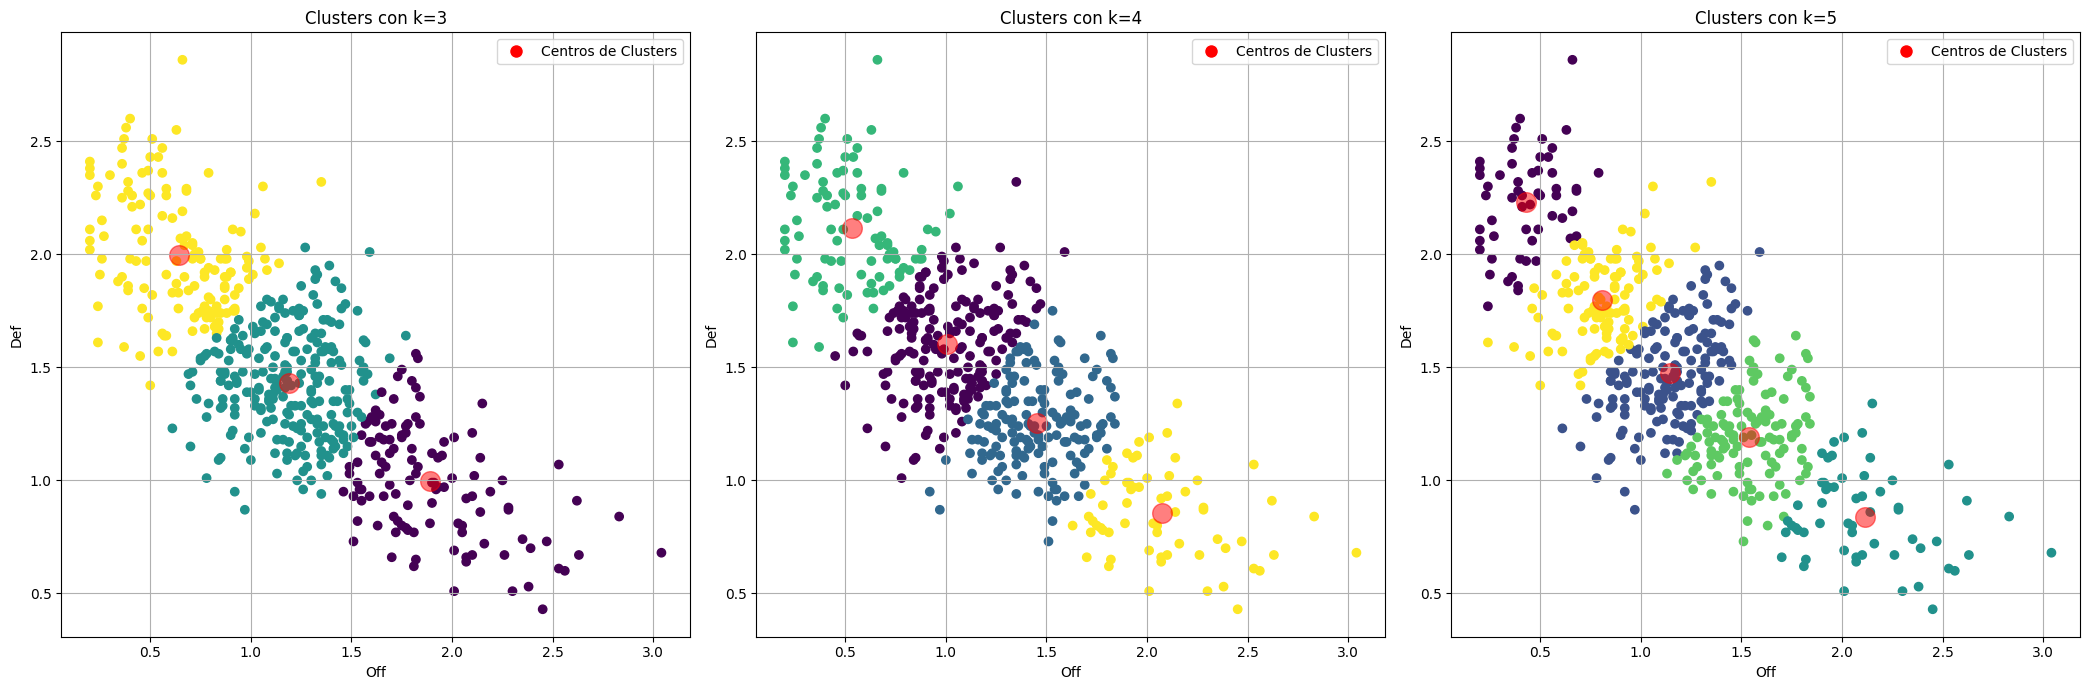

In [68]:
# Implementación de K-means con k=3
kmeans_3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_3.fit(equipos[['off', 'def']])

# Etiquetas de los clusters para k=3
clusters_3 = kmeans_3.labels_
# Centros de los clusters para k=3
centers_3 = kmeans_3.cluster_centers_
# Añadir estas etiquetas a tu DataFrame para k=3
equipos['cluster_k3'] = clusters_3

# Implementación de K-means con k=4
kmeans_4 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_4.fit(equipos[['off', 'def']])

# Etiquetas de los clusters para k=4
clusters_4 = kmeans_4.labels_
# Centros de los clusters para k=4
centers_4 = kmeans_4.cluster_centers_
# Añadir estas etiquetas a tu DataFrame para k=4
equipos['cluster_k4'] = clusters_4

# Implementación de K-means con k=5
kmeans_5 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_5.fit(equipos[['off', 'def']])

# Etiquetas de los clusters para k=5
clusters_5 = kmeans_5.labels_
# Centros de los clusters para k=5
centers_5 = kmeans_5.cluster_centers_
# Añadir estas etiquetas a tu DataFrame para k=5
equipos['cluster_k5'] = clusters_5


plt.figure(figsize=(21, 7))
plt.subplot(1, 3, 1)
plt.scatter(equipos['off'], equipos['def'], c=clusters_3, cmap='viridis')
plt.scatter(centers_3[:, 0], centers_3[:, 1], c='red', s=200, alpha=0.5, marker='o')  # Centros de los clusters
plt.title('Clusters con k=3')
plt.xlabel('Off')
plt.ylabel('Def')
plt.grid(True)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)], labels=['Centros de Clusters'])

# Scatter plot para k=4
plt.subplot(1, 3, 2)
plt.scatter(equipos['off'], equipos['def'], c=clusters_4, cmap='viridis')
plt.scatter(centers_4[:, 0], centers_4[:, 1], c='red', s=200, alpha=0.5, marker='o')  # Centros de los clusters
plt.title('Clusters con k=4')
plt.xlabel('Off')
plt.ylabel('Def')
plt.grid(True)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)], labels=['Centros de Clusters'])

# Scatter plot para k=5
plt.subplot(1, 3, 3)
plt.scatter(equipos['off'], equipos['def'], c=clusters_5, cmap='viridis')
plt.scatter(centers_5[:, 0], centers_5[:, 1], c='red', s=200, alpha=0.5, marker='o')  # Centros de los clusters
plt.title('Clusters con k=5')
plt.xlabel('Off')
plt.ylabel('Def')
plt.grid(True)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)], labels=['Centros de Clusters'])

plt.tight_layout()
plt.show()


## Análisis de la Clasificación de Clústeres

Tras aplicar el algoritmo K-Means con \( k=3 \), \( k=4 \), y \( k=5 \), hemos observado diferencias significativas en la segmentación de los equipos de fútbol basándonos en sus estadísticas ofensivas y defensivas.

- Con **\( k=3 \)**, los equipos se dividen en tres grupos que reflejan estrategias de juego de alto, medio y bajo rendimiento en las áreas ofensiva y defensiva. Este nivel de agrupación proporciona una visión general clara pero no distingue entre las sutilezas dentro de los equipos de rendimiento medio.

- Al utilizar **\( k=4 \)**, emergen cuatro grupos distintos, permitiéndonos identificar y distinguir con mayor claridad los equipos de rendimiento medio en dos sectores diferenciados. Esta segmentación es ideal para nuestro análisis, ya que proporciona la granularidad necesaria para entender mejor las fortalezas y debilidades relativas sin ser excesivamente detallada.

- Con **\( k=5 \)**, la clasificación se vuelve más detallada, lo que podría ser útil para análisis muy específicos pero puede resultar demasiado fragmentada para la aplicación estratégica general.

Dado que nuestro objetivo es distinguir de manera efectiva entre los diferentes niveles de rendimiento, especialmente entre los equipos con rendimientos intermedios, hemos determinado que **\( k=4 \)** es el número ideal de clústeres para nuestro modelo. Nos permite identificar un grupo adicional de equipos que son balanceados en su desempeño, lo cual es esencial para las estrategias de desarrollo y competición en nuestra liga.


In [76]:
equipos['KMeans_Clase'] = equipos['cluster_k4']
equipos

,off,def,cluster_k3,cluster_k4,cluster_k5,KMeans_Clase,Color_Cluster
name,,,,,,,
Luton Town,1.35,0.94,1,1,3,1,azul
Anderlecht,1.46,1.18,1,1,3,1,azul
Empoli,1.57,1.25,0,1,3,1,azul
Austria Lustenau,1.31,1.82,1,0,1,0,rojo
Leganes,0.86,1.33,1,0,1,0,rojo
...,...,...,...,...,...,...,...
Millwall,1.33,1.25,1,1,3,1,azul
Guingamp,1.13,1.40,1,0,1,0,rojo
Boca Juniors,1.13,1.03,1,1,3,1,azul


In [78]:
equipos.to_csv('equipos.csv', index=False)  


## Conclusiones del Análisis de Clústeres K-Means

Tras la implementación del algoritmo K-Means para clasificar equipos de fútbol, hemos llegado a las siguientes conclusiones:

1. **Eficiencia en la Segmentación**: K-Means ha demostrado ser un método eficiente para segmentar equipos de fútbol en grupos basados en sus habilidades ofensivas y defensivas. La técnica ha facilitado la identificación de patrones y la diferenciación de estrategias de equipo que no eran inmediatamente evidentes.

2. **Optimización de k**: La aplicación del método del codo ha sido fundamental para determinar un número óptimo de clústeres. Hemos identificado que \( k=4 \) ofrece una granularidad que equilibra la complejidad y la utilidad práctica, permitiéndonos distinguir adecuadamente entre equipos con diferentes niveles de rendimiento.


